In [1]:
!pip install opencv-python
!pip install Pillow
!pip install tensorflow

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input,Dense,Conv2D,MaxPooling2D,Dropout,BatchNormalization,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve

In [3]:
data_dir = r"C:\Users\Admin\Downloads\Major Project New\rice_leaf_diseases\rice_leaf_diseases"

In [4]:
data_dir

'C:\\Users\\Admin\\Downloads\\Major Project New\\rice_leaf_diseases\\rice_leaf_diseases'

In [5]:
data_dir=pathlib.Path(data_dir)

In [6]:
bacteria=list(data_dir.glob("Bacterial leaf blight/*"))
len(bacteria)

847

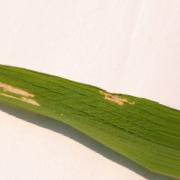

In [7]:
PIL.Image.open(str(bacteria[0]))

In [8]:
brown=list(data_dir.glob("Brown spot/*"))
len(brown)

845

In [9]:
image_dict={"bacteria":list(data_dir.glob("Bacterial leaf blight/*")),
      "brown":list(data_dir.glob("Brown spot/*")),
      "smut":list(data_dir.glob("Leaf smut/*")),
      "blast":list(data_dir.glob("blast/*")),
      "tungro":list(data_dir.glob("tungro/*"))
     }

In [10]:
labels_dict = {
    'bacteria': 0,
    'brown': 1,
    'smut': 2,
    'blast':3,
    'tungro':4
   }

In [11]:
str(image_dict["smut"][0])

'C:\\Users\\Admin\\Downloads\\Major Project New\\rice_leaf_diseases\\rice_leaf_diseases\\Leaf smut\\aug-smut_0_1014.jpeg'

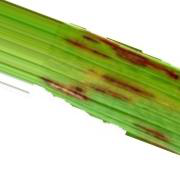

In [12]:
PIL.Image.open(str(image_dict["smut"][0]))

In [13]:
# from keras.preprocessing.image import img_to_array, load_img

# datagen = ImageDataGenerator(
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# augmented_images_dir = 'rice-leaf-disease-detection/rice_leaf_diseases/augmented_images'

# os.makedirs(augmented_images_dir, exist_ok=True)

# for name, images in image_dict.items():
    
#     image_class_dir = augmented_images_dir + '/' + name
#     os.makedirs(image_class_dir, exist_ok=True)
    
#     for image in images:
        
#         img = cv2.imread(str(image))
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         img = cv2.resize(img,(180,180))
        
#         x = img_to_array(img)
#         x = x.reshape((1,) + x.shape)

#         i = 0
#         for batch in datagen.flow(x, batch_size=1,
#                                   save_to_dir=image_class_dir, 
#                                   save_prefix=f'aug-{name}', 
#                                   save_format='jpeg'):
#             i += 1
#             if i > 20:
#                 break

In [14]:
len(image_dict['tungro'])

849

In [15]:
X, y = [], []
for name, images in image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(labels_dict[name])

In [16]:
len(y)

5018

In [17]:
y[:5]

[0, 0, 0, 0, 0]

In [18]:
y[900:906]

[1, 1, 1, 1, 1, 1]

In [19]:
y[2000:2006]

[2, 2, 2, 2, 2, 2]

In [20]:
X[0].shape

(180, 180, 3)

In [21]:
X = np.array(X)
y = np.array(y)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [23]:
len(X_test)

1255

In [24]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [25]:
model1 = Sequential([
    Input((180,180,3)),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(5,activation='softmax')
])

model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [26]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      15,859,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,973,829 (60.94 MB)

 Trainable params: 15,973,829 (60.94 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
#model1=model1.fit(X_train_scaled, y_train, epochs=30)
#history = model1.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=30, verbose=1)
try:
    history = model1.fit(
        X_train_scaled, y_train,
        validation_data=(X_test_scaled, y_test),
        epochs=30,
        verbose=1
    )
except KeyboardInterrupt:
    print("\nTraining interrupted!")

Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 739s 6s/step - accuracy: 0.4826 - loss: 1.4793 - val_accuracy: 0.6749 - val_loss: 0.6990
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 583s 5s/step - accuracy: 0.7444 - loss: 0.5853 - val_accuracy: 0.7753 - val_loss: 0.4812
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 563s 5s/step - accuracy: 0.7906 - loss: 0.4727 - val_accuracy: 0.8088 - val_loss: 0.4287
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 514s 4s/step - accuracy: 0.8424 - loss: 0.3646 - val_accuracy: 0.7992 - val_loss: 0.4235
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 634s 5s/step - accuracy: 0.8882 - loss: 0.2776 - val_accuracy: 0.9100 - val_loss: 0.2291
Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 546s 5s/step - accuracy: 0.9218 - loss: 0.2014 - val_accuracy: 0.9203 - val_loss: 0.2101
Epoch 7/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 582s 5s/step - accuracy: 0.9504 - loss: 0.1487 - val_accuracy: 0.9410 - val_loss: 0.1630
Epoch 8/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 553s 5s/step - accuracy: 0.9866 - loss: 0.0439 - val_accu

In [28]:
model1.evaluate(X_test_scaled,y_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 608ms/step - accuracy: 0.9556 - loss: 0.1945


[0.16445475816726685, 0.9593625664710999]

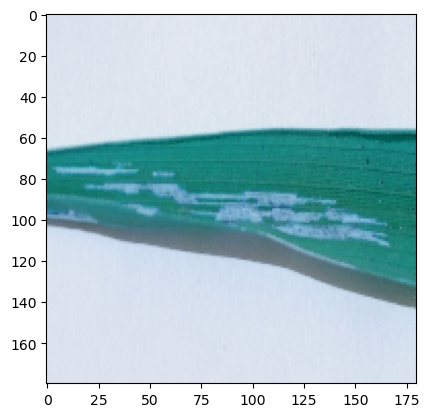

In [29]:
plt.imshow(X_test[540])

In [30]:
input_image = X_test[540] / 255.0
input_image = np.expand_dims(input_image, axis=0)

In [31]:
pre = model1.predict(input_image)
for disease,val in labels_dict.items():
    if np.argmax(pre) == val:
        print(disease)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
bacteria


In [32]:
model1.save('riceleaf_newmodel.h5')

In [36]:
test_img = cv2.imread(r"C:\Users\Admin\Downloads\Major Project New\rice_leaf_diseases\rice_leaf_diseases\blast\aug-blast_0_21.jpeg")
test_img = cv2.resize(test_img,(180,180))
test_img = np.array(test_img)
test_img = test_img / 255
test_img = np.expand_dims(test_img, axis=0)
pre = model1.predict(test_img)
for disease,val in labels_dict.items():
    if np.argmax(pre) == val:
        print(disease)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
blast


In [38]:
test_loss, test_accuracy = model1.evaluate(X_test_scaled, y_test, verbose=0)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss: 0.16445475816726685
Test Accuracy: 0.9593625664710999


In [40]:
y_pred = model1.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 37s 925ms/step


In [42]:
#Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=labels_dict.keys()))


Classification Report:
              precision    recall  f1-score   support

    bacteria       0.97      0.98      0.97       201
       brown       0.95      0.91      0.93       206
        smut       0.94      0.97      0.96       220
       blast       0.98      0.98      0.98       405
      tungro       0.95      0.95      0.95       223

    accuracy                           0.96      1255
   macro avg       0.96      0.96      0.96      1255
weighted avg       0.96      0.96      0.96      1255



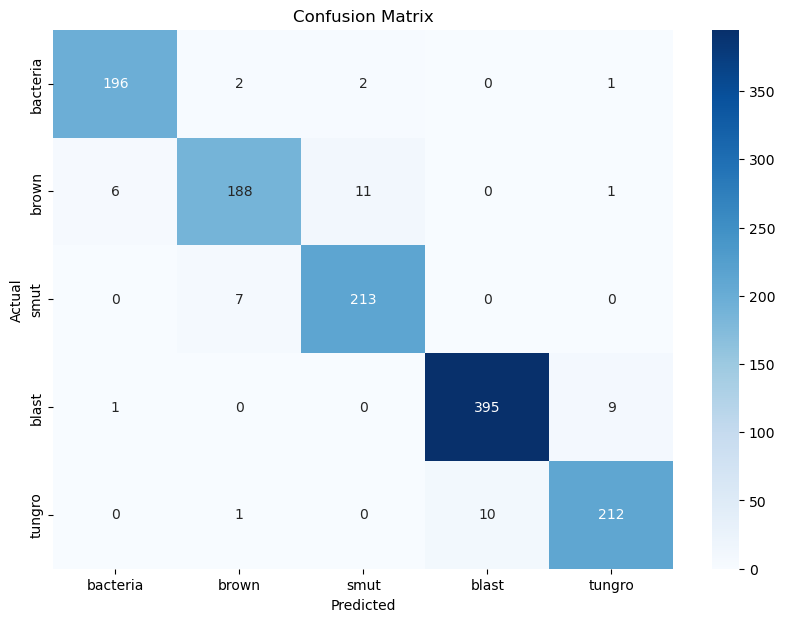

In [44]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels_dict.keys(), yticklabels=labels_dict.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

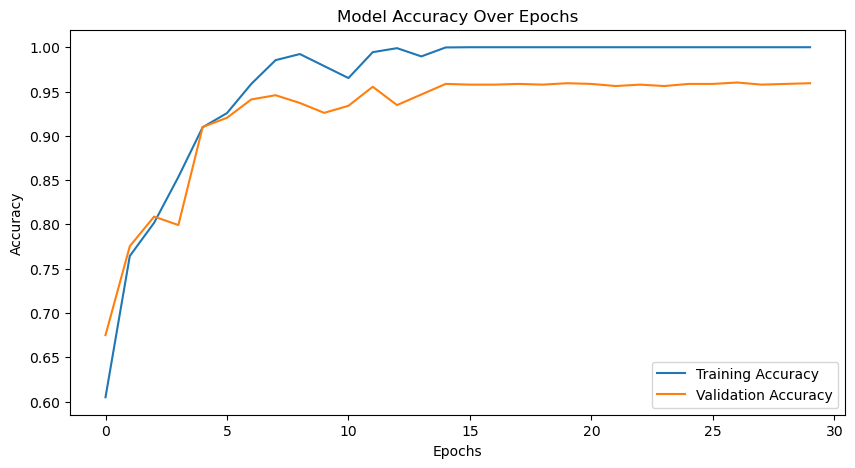

In [46]:
#Accuracy vs. Epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

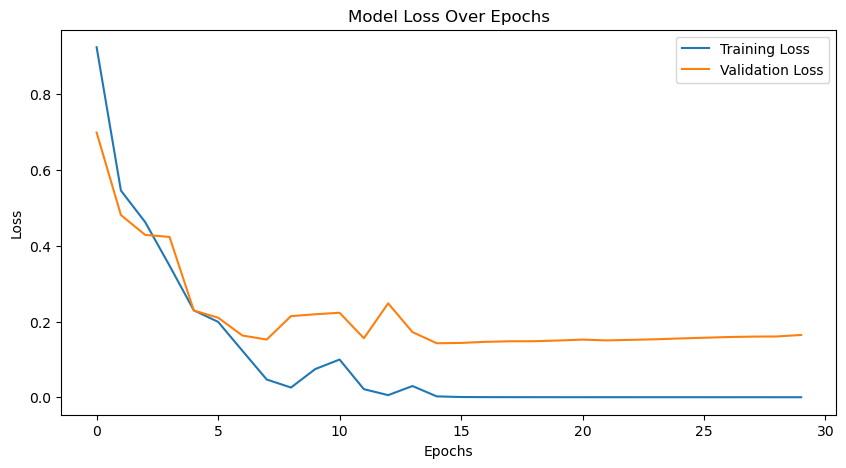

In [48]:
#Loss vs. Epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

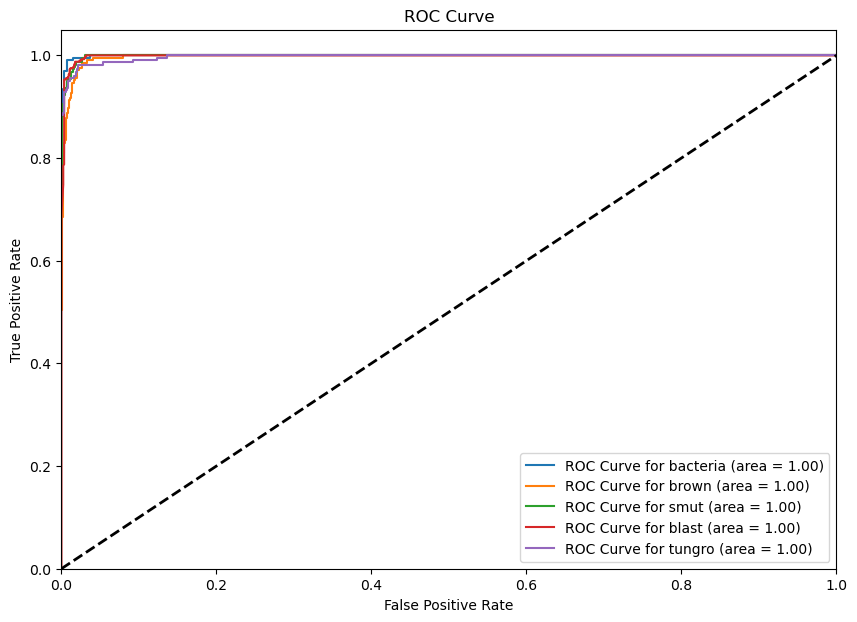

In [50]:
#ROC Curve for Each Class
y_test_binarized = label_binarize(y_test, classes=list(labels_dict.values()))
n_classes = y_test_binarized.shape[1]
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"ROC Curve for {list(labels_dict.keys())[i]} (area = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

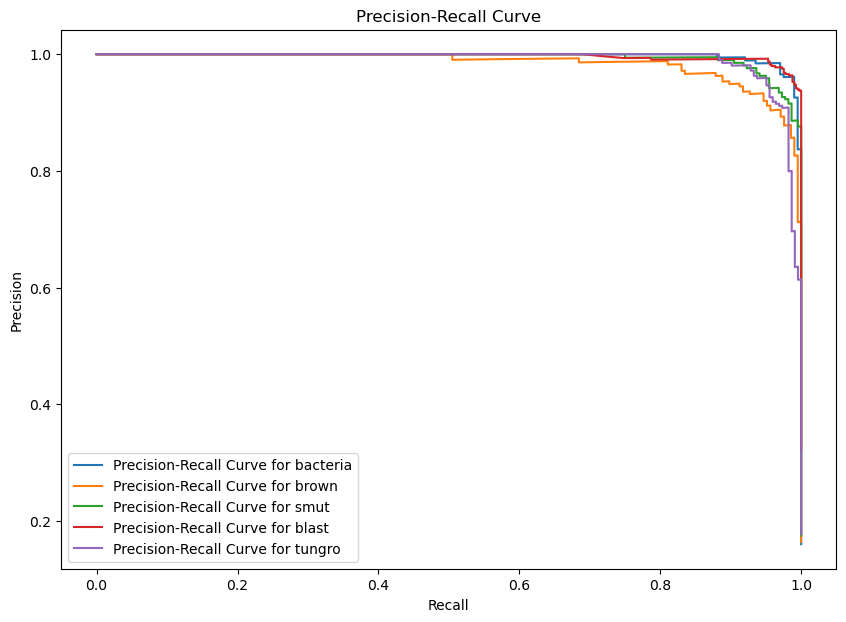

In [52]:
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred[:, i])
    plt.plot(recall, precision, label=f"Precision-Recall Curve for {list(labels_dict.keys())[i]}")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.show()